<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9: Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Input data

In [2]:
# Input array
X = np.array([
  [1, 0, 1, 0],
  [1, 0, 1, 1],
  [0, 1, 0, 1]
])

# Output
y = np.array([
  [1],
  [1],
  [0]
])

In [3]:
#new set of data
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

## Functions

In [6]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

## Variable initialization

In [7]:
# Setting training iterations
epoch = 1000  #one epoch represents forward and back propagation of all the data once
# Setting learning rate
lr = 0.1
# number of features in data set
input_layer_size = X.shape[1] #input size = 4 cause you have 4 features
# number of hidden layers neurons
hidden_layer_1_size = 3 #3 neurons in the hidden layer
# number of neurons at output layer
output_layer_size = 1 #label

### Weights and Bias

In [8]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size))
bh1 = np.random.uniform(size = (1, hidden_layer_1_size))
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size))
bout = np.random.uniform(size = (1, output_layer_size))

## Calculation

In [20]:
cost = []
for i in range(epoch):
    # Forward Propagation
    hidden_layer_1 = np.dot(X, wh1)
    hidden_layer_1 = hidden_layer_1 + bh1
    hidden_layer_1_activation = sigmoid(hidden_layer_1)

    output_layer = np.dot(hidden_layer_1_activation, wout)
    output_layer = output_layer + bout

    output = sigmoid(output_layer)

    # Backpropagation
    E = y - output
    cost.append(np.square(E).sum())

    slope_output_layer = sigmoid_derivative(output)
    d_output = E * slope_output_layer

    error_hidden_layer_1 = d_output.dot(wout.T)
    slope_hidden_layer_1 = sigmoid_derivative(hidden_layer_1_activation)
    d_hidden_layer_1 = error_hidden_layer_1 * slope_hidden_layer_1

    wout += hidden_layer_1_activation.T.dot(d_output) * lr
    bout += np.sum(d_output,  axis = 0, keepdims = True) * lr
    wh1 += X.T.dot(d_hidden_layer_1) * lr
    bh1 += np.sum(d_hidden_layer_1,  axis = 0, keepdims = True) * lr
    print('epoch: {}, cost: {}'.format(i,np.square(E).sum()))

epoch: 0, cost: 39.371463888709
epoch: 1, cost: 24.745648366231286
epoch: 2, cost: 24.74654776686253
epoch: 3, cost: 24.756522029701713
epoch: 4, cost: 24.75695265943178
epoch: 5, cost: 24.76865051101697
epoch: 6, cost: 24.768329776548544
epoch: 7, cost: 24.781834942181437
epoch: 8, cost: 24.780430445743665
epoch: 9, cost: 24.79576719241453
epoch: 10, cost: 24.792913013395754
epoch: 11, cost: 24.810032312822038
epoch: 12, cost: 24.80535524581885
epoch: 13, cost: 24.824126446775335
epoch: 14, cost: 24.81728009879099
epoch: 15, cost: 24.83749037534212
epoch: 16, cost: 24.828192355062733
epoch: 17, cost: 24.849554850377856
epoch: 18, cost: 24.83762043926148
epoch: 19, cost: 24.859790251456463
epoch: 20, cost: 24.845155879144034
epoch: 21, cost: 24.867751416427968
epoch: 22, cost: 24.850483271930297
epoch: 23, cost: 24.87310958638449
epoch: 24, cost: 24.85339615471468
epoch: 25, cost: 24.875666891802084
epoch: 26, cost: 24.853797833363384
epoch: 27, cost: 24.87535325965133
epoch: 28, cost:

## Results

In [21]:
ii = range(len(y))
yy = y.flatten()
oo = output.flatten()
ab = np.abs(oo - yy)
bo = np.array([0 if oi < 0.5 else 1 for oi in oo])
tt = ['Yes' if ti else 'No' for ti in (yy == bo)]

print('index Expect Output Error Binary Correct')
print('----- ------ ------ ----- ------ -------')
ima = int((0.9 * len(yy)))
imi = len(yy) - ima
dots = False
for i, a, b, c, d, e in zip(ii, yy, oo, ab, bo, tt):
    #if (i < imi) | (i > ima):
    print(' %3d     %d    %.2f   %.2f    %d     %s' % (i, a, b, c, d, e))
    #else:
    #    if dots:
    #        print(' ...')
    #        dots = False
aa = (yy == bo).sum() / len(yy)
print('\nCost Minimum: %.4f' % min(cost))
print('Accuracy    : %.2f' % aa)

index Expect Output Error Binary Correct
----- ------ ------ ----- ------ -------
   0     1    0.54   0.46    1     Yes
   1     1    0.63   0.37    1     Yes
   2     0    0.23   0.23    0     Yes
   3     0    0.75   0.75    1     No
   4     0    0.74   0.74    1     No
   5     0    0.39   0.39    0     Yes
   6     0    0.43   0.43    0     Yes
   7     0    0.19   0.19    0     Yes
   8     0    0.39   0.39    0     Yes
   9     1    0.34   0.66    0     No
  10     0    0.29   0.29    0     Yes
  11     1    0.39   0.61    0     No
  12     1    0.74   0.26    1     Yes
  13     0    0.25   0.25    0     Yes
  14     1    0.59   0.41    1     Yes
  15     0    0.79   0.79    1     No
  16     0    0.54   0.54    1     No
  17     0    0.31   0.31    0     Yes
  18     0    0.23   0.23    0     Yes
  19     1    0.54   0.46    1     Yes
  20     0    0.39   0.39    0     Yes
  21     1    0.74   0.26    1     Yes
  22     1    0.39   0.61    0     No
  23     0    0.19   0.19   

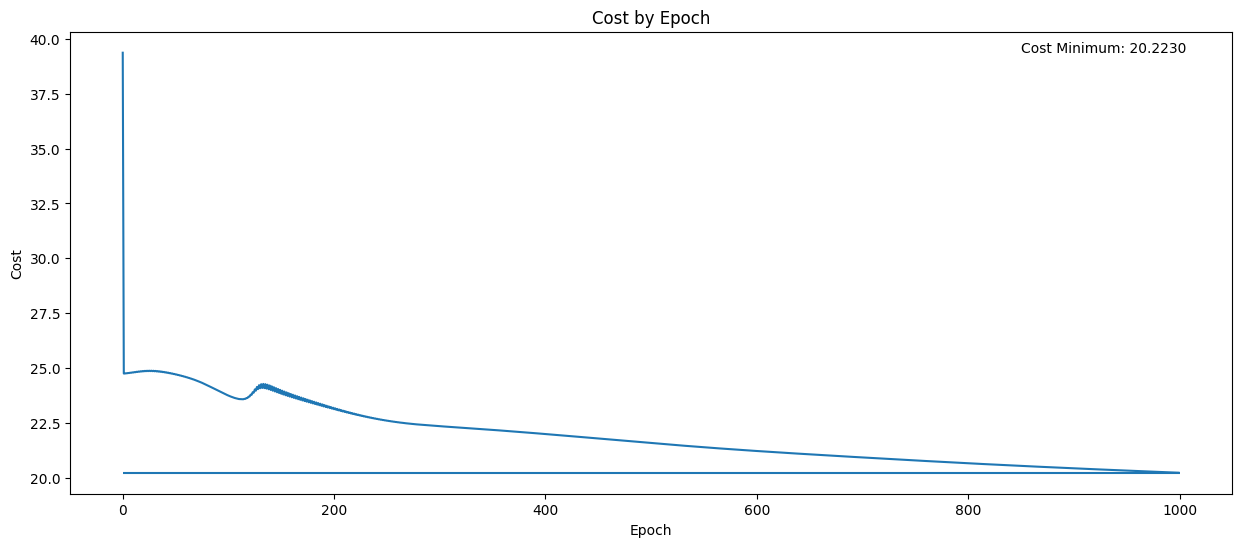

In [23]:
plt.figure(figsize = (15, 6))
plt.plot(cost)
plt.hlines(min(cost), 0, epoch)
plt.text(epoch - 150, max(cost), 'Cost Minimum: %.4f' % min(cost))
plt.title('Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Create new data and re-run
Create new data and re-run from **Weights and Bias**.

In [ ]:
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

In [ ]:
y

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
    



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



